In [1]:
import lightkurve as lk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def downloadTarget(star):
    res = lk.search_lightcurve(star, exptime=1800)[-1].download()
    print(f"Downloaded target {star}")
    return res

In [3]:
print("Loading Datset ...")
df = pd.read_csv('dataset/kepler_koi_list.csv')
df.head()

Loading Datset ...


,loc_rowid,kepid,kepoi_name,koi_disposition,koi_pdisposition
0,1,11446443,K00001.01,CONFIRMED,CANDIDATE
1,2,10666592,K00002.01,CONFIRMED,CANDIDATE
2,3,10748390,K00003.01,CONFIRMED,CANDIDATE
3,4,3861595,K00004.01,CONFIRMED,CANDIDATE
4,5,8554498,K00005.01,CANDIDATE,CANDIDATE


In [4]:
koi = [str(i) for i in df.kepid]


In [5]:
star = koi[0]
print("Target id: ", star)

Target id:  11446443


In [6]:
data = downloadTarget(star)

Downloaded target 11446443


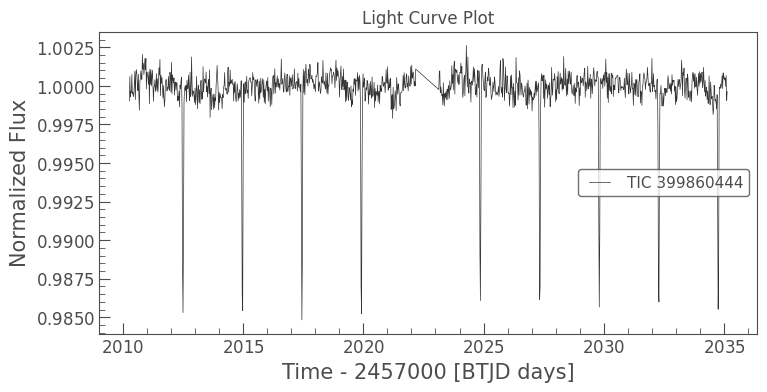

In [7]:
data.plot()
plt.title("Light Curve Plot")
plt.show()

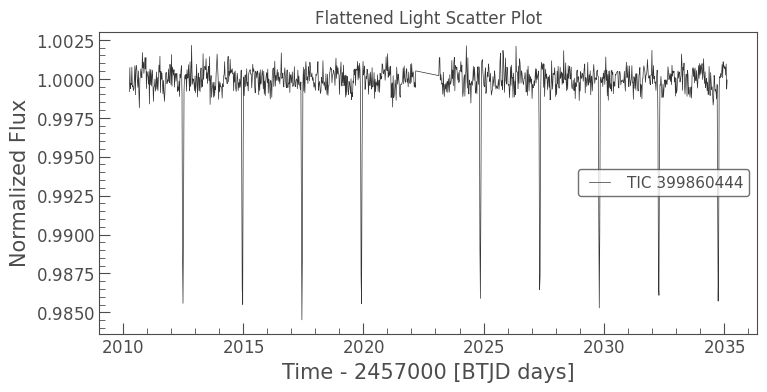

In [8]:
flattened_lc = data.flatten()
flattened_lc.plot()
plt.title("Flattened Light Scatter Plot")
plt.show()

Best Fitting Period is 2.470 d


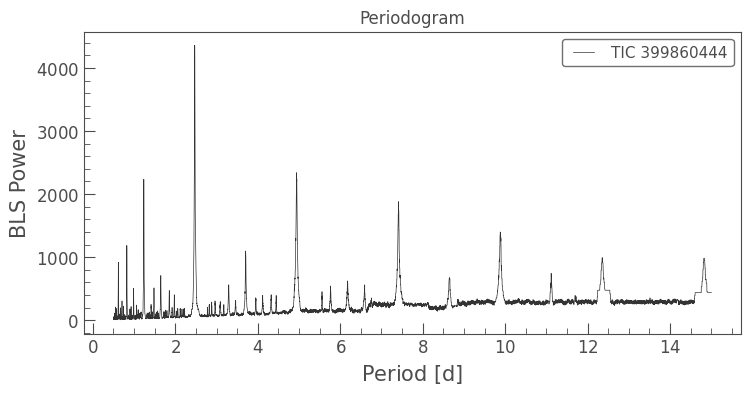

In [9]:
periodogram = flattened_lc.to_periodogram(method="bls", period=np.arange(0.5, 15, 0.001))
best_fit_period = periodogram.period_at_max_power
print("Best Fitting Period is {:.3f}".format(best_fit_period))
periodogram.plot()
plt.title("Periodogram")
plt.show()

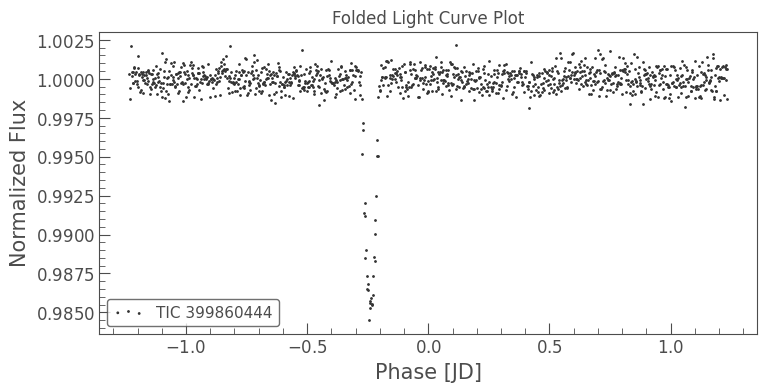

In [10]:
folded_lc = flattened_lc.fold(period=best_fit_period)
folded_lc.scatter()
plt.title("Folded Light Curve Plot")
plt.show()

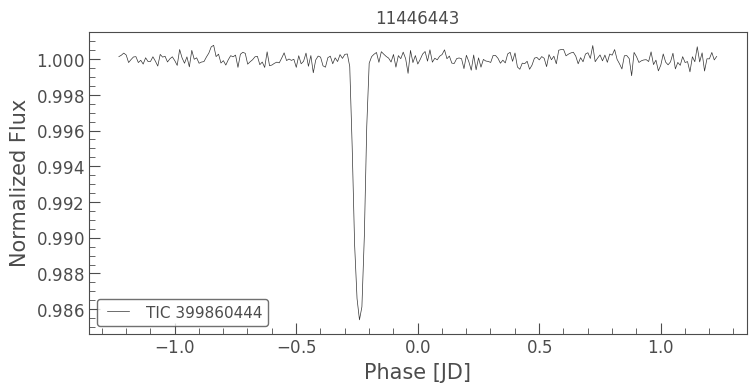

In [11]:
binned_lc = folded_lc.bin(time_bin_size=0.01)
binned_lc.plot()
plt.title(star)
plt.show()

In [12]:
len(binned_lc)

247